In [1]:
# import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from aero_design_functions import *
from scipy.optimize import fsolve
from lacbox.io import load_pwr, load_ind, load_inds, load_ae, load_pc, load_oper
from lacbox.io import load_cmb, load_amp
from lacbox.vis import plot_amp
from lacbox.test import test_data_path
import matplotlib.pyplot as plt
from lacbox.test import test_data_path
from myteampack import MyHTC
#from Our_values import *
from scipy.interpolate import interp1d

plt.rcParams.update({'font.family': 'serif', 'font.size':12})


In [2]:
# Path to the .cmb file
cmb_path = "hawc_files/our_design/hawcstab2_elastic_campbell.cmb"
# cmb_path = '/Users/mathe/OneDrive - Centrale Lille/Documents/Scolarship/_46320 Loads, Aerodynamics and Control of Wind Turbines/Assignments/LAC_repo/assignment_2/aero_dofs_new'
cmb_type = "aeroelastic"

# Load the data
wsp, dfreqs, zetas = load_cmb(cmb_path, cmb_type)  # wind speed, damped natural freqs, and damping values

# print the shape
dfreqs.shape  # n_wsp x n_modes


FileNotFoundError: hawc_files/our_design/hawcstab2_elastic_campbell.cmb not found.

In [ ]:
# extract data from HAWC result
P_harm_path = "hawc_files/our_design/data/Group1_camp_diagram.opt"
P_harm_data = load_oper(P_harm_path)
#print(rigid_data.keys())

print(P_harm_data)

{'ws_ms': array([ 4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 11.1, 11.2, 11.3,
       11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 13. , 14. , 15. , 16. ,
       17. , 18. , 19. , 20. , 21. , 22. , 23. , 24. , 25. ]), 'pitch_deg': array([1.0700000e-03, 1.0700000e-03, 1.0700000e-03, 1.0700000e-03,
       1.0700000e-03, 1.0700000e-03, 1.0700000e-03, 1.0700000e-03,
       1.0700000e-03, 2.1390000e-03, 6.7912800e-01, 1.6497550e+00,
       2.3985340e+00, 2.9809120e+00, 3.4591160e+00, 3.8794070e+00,
       4.2667580e+00, 4.6181170e+00, 7.3068400e+00, 9.2273480e+00,
       1.0837742e+01, 1.2276045e+01, 1.3603174e+01, 1.4864868e+01,
       1.6060948e+01, 1.7203927e+01, 1.8306284e+01, 1.9370136e+01,
       2.0400434e+01, 2.1401111e+01, 2.2378070e+01]), 'rotor_speed_rpm': array([3.311382, 4.139227, 4.967073, 5.794918, 6.622764, 7.450609,
       8.278455, 9.1063  , 9.189085, 9.271869, 9.354654, 9.43743 ,
       9.520197, 9.6     , 9.6     , 9.6     , 9.6     , 9.6     ,
       9.6     , 9.6     

1P, 3P, 6P


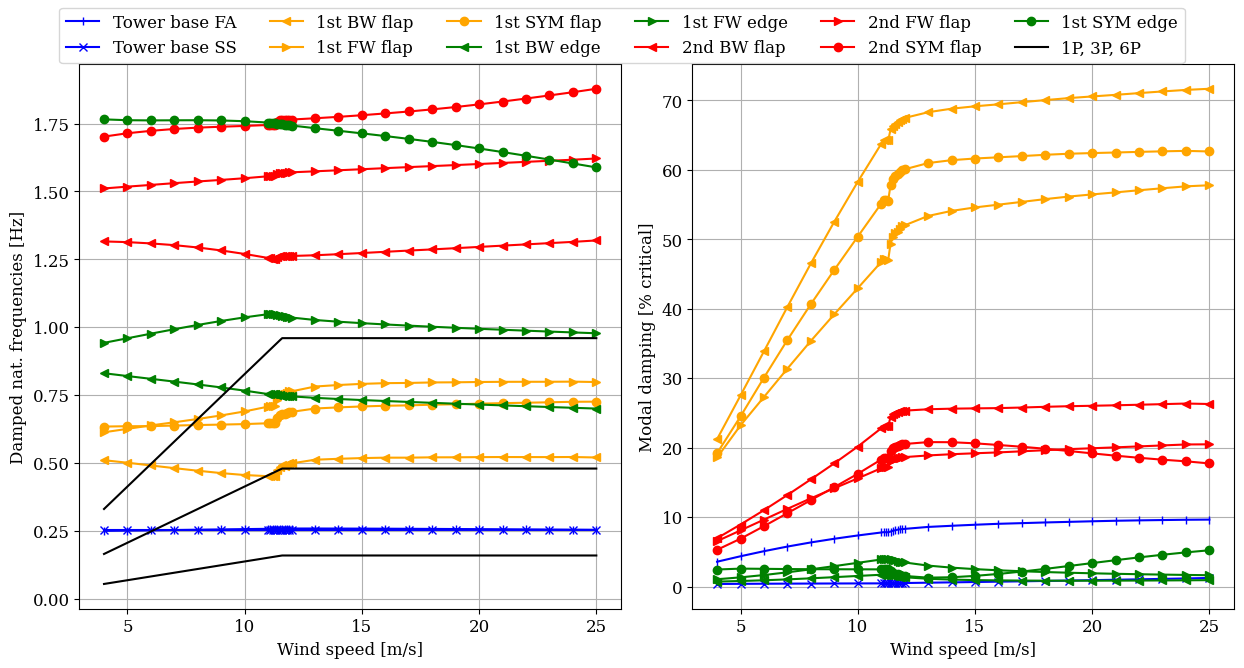

In [ ]:
nmodes = dfreqs.shape[1]  # get number of modes

#dfreqs = [np.delete(arr, 9) for arr in dfreqs]
#zetas = [np.delete(arr, 9) for arr in zetas]
#mode_names = [f'Mode {i}' for i in range(1, nmodes+1) if i != 10]
#P harmonic wanted
P_want = [1,3,6]
print(f"{P_want[0]}P, {P_want[1]}P, {P_want[2]}P")
mode_names = ["Tower base FA", "Tower base SS", "1st BW flap", "1st FW flap", "1st SYM flap", "1st BW edge", "1st FW edge", "2nd BW flap", "2nd FW flap", "2nd SYM flap"
              , "1st SYM edge","1P, 3P, 6P"]
mode_color = ["blue","blue","orange","orange","orange","green","green","red","red","red","green"]
mode_marker = ["|","x","<",">","o","<",">","<",">","o","o"]
fig, axs = plt.subplots(1, 2, figsize=(9, 4.5))


# left plot: damped nat freqs in ground-fixed frame


for k in range (11):
    axs[0].plot(wsp, dfreqs[:,k], color=mode_color[k], marker=mode_marker[k])#, label=mode_names[k])

for P in P_want:
    harmonic_line=axs[0].plot(P_harm_data["ws_ms"],P*(P_harm_data["rotor_speed_rpm"]*(1/60)), color="black")


axs[0].set(xlabel='Wind speed [m/s]', ylabel='Damped nat. frequencies [Hz]')
axs[0].grid()

# right plot: percent criticl damping
for k in range (11):
    lines = axs[1].plot(wsp, zetas[:,k], color=mode_color[k], marker=mode_marker[k])
axs[1].set(xlabel='Wind speed [m/s]', ylabel='Modal damping [% critical]')
axs[1].grid()

fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
#fig.legend(loc='lower center', labels=mode_names, bbox_to_anchor=(0.5, -0.25), ncol=nmodes/3)

# add legend with 6 columns in center
lines=lines.append(harmonic_line)


fig.tight_layout(rect=[-0.2, -0.5, 1.2, 0.9])
fig.legend(loc='outside upper center', handles=lines, labels=mode_names, ncols=6)
#fig.tight_layout()
fig.savefig(f'02_aeroelastic.pdf', format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
# Path to the .amp file
amp_path = 'aero_dofs_new_amp.amp'

# Load the modal amplitudes
amp_df = load_amp(amp_path)

print(amp_df.index)
amp_df.head()

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
                  16,            17,            18,            19,
                  20,            21,            22,            23,
                  24,            25,            26,            27,
                  28,            29,            30, 'mode_number'],
      dtype='object')


C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\lacbox\io.py:85: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, comment='#', header=None)


,Wind speed,TWR x [m],phase [deg],TWR y [m],phase [deg],TWR yaw [rad],phase [deg],SFT x [m],phase [deg],SFT y [m],...,BW flap [m],phase [deg],FW flap [m],phase [deg],Sym tors [rad],phase [deg],BW tors [rad],phase [deg],FW tors [rad],phase [deg]
0,4.0,0.087362,-97.7802,1.000000,115.573,0.000321,-178.955,0.000164,-5.39673,0.000621,...,0.030970,40.4070,0.036596,134.9350,0.005896,67.8952,0.000243,-128.1380,0.000292,-67.5866
1,5.0,0.095776,-79.1791,1.000000,127.718,0.000381,-170.522,0.000198,3.55226,0.000640,...,0.027064,40.8066,0.033417,133.4600,0.005130,50.4784,0.000227,-124.3430,0.000281,-69.5205
2,6.0,0.100524,-79.3643,0.991586,123.130,0.000420,-178.038,0.000222,-3.59330,0.000655,...,0.023361,-156.2420,0.030065,-30.9093,0.003790,-166.3710,0.000208,40.6943,0.000262,126.9350
3,7.0,0.096574,-80.1142,0.919262,119.382,0.000410,176.254,0.000219,-9.13675,0.000626,...,0.020488,-150.8150,0.027441,-37.9915,0.002661,158.1820,0.000192,47.0020,0.000245,121.9190
4,8.0,0.093193,-81.1653,0.869078,116.277,0.000395,172.452,0.000212,-12.96930,0.000610,...,0.018105,-145.7820,0.025226,-44.8458,0.003361,107.2750,0.000174,51.6721,0.000227,118.4630


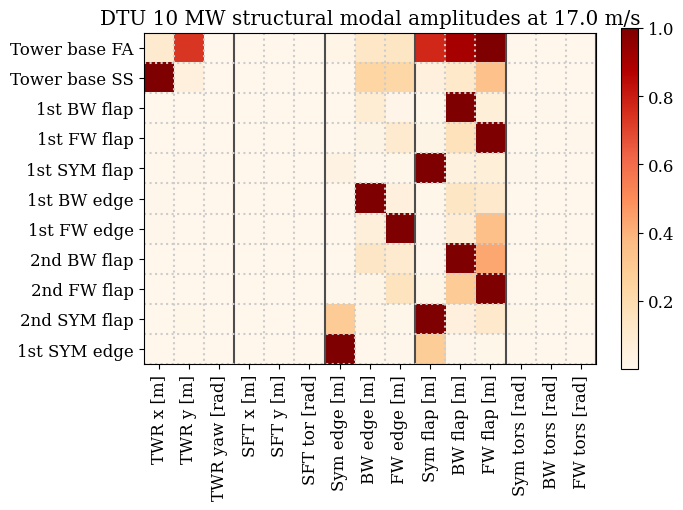

In [ ]:
wsp_1 = 17  # choose a wind speed

fig, ax = plot_amp(amp_df, mode_names[:-1], wsp_1, title=f'DTU 10 MW structural modal amplitudes at {wsp_1:.1f} m/s')